In [1]:
import pandas as pd
from datetime import datetime

data = pd.read_csv("C:/Users/Aileen/Downloads/NYPD_Complaint_Data_Historic.csv")
data.head(3)

C:\Users\Aileen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"


In [106]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [2]:
def date_rng(start, end, df):
    '''
    input start date and end date
    return corresponding dataframe
    '''
    dlist = []
    date_start = datetime.strptime(start, '%m/%d/%Y')
    #print(date_start)
    date_end = datetime.strptime(end, '%m/%d/%Y')
    #print(date_end)
    datelist = pd.date_range(date_start,date_end).tolist()
    #print(datelist)
    for d in datelist:
        dlist.append(d.strftime('%m/%d/%Y'))
    dat = df.loc[df['RPT_DT'].isin(dlist)]
    return dat

In [3]:
def day_dist(date, col,df,n=10):
    '''
    input date and group by column
    return the distribution on that day
    '''
    dat = df.loc[df['RPT_DT']==date]
    dfg = dat['RPT_DT'].groupby(dat[col])
    maxv = max(dfg.count())
    minv = min(dfg.count())
    print('max idx %s, max value %s' % (dfg.count().idxmax(), maxv))
    print('max idx %s, max value %s' % (dfg.count().idxmin(), minv))
    
    output = pd.DataFrame()
    output[col] = dfg.count().index
    output['COUNT'] = dfg.count().values
    output = output.sort_values(['COUNT'],ascending=False).head(n)
    
    return output

In [4]:
day_dist('12/31/2015', 'LOC_OF_OCCUR_DESC', data, n = 30)

max idx INSIDE, max value 595
max idx OUTSIDE, max value 2


,LOC_OF_OCCUR_DESC,COUNT
1,INSIDE,595
0,FRONT OF,245
2,OPPOSITE OF,31
4,REAR OF,25
3,OUTSIDE,2


### Weather

In [5]:
import pandas as pd
import numpy as np

weather = pd.read_csv("C:/Users/Aileen/Downloads/weather06-15.csv")
weather = weather.ix[:,2:]

weather['DATE'] = weather['DATE'].apply(lambda x: str(x)[4:6] + '/' + str(x)[-2:] + '/' + str(x)[0:4])
weather['TAVG'] = weather[["TMAX", "TMIN"]].mean(axis = 1)

# weather.columns.values[0] = 'RPT_DT'
weather['RPT_DT'] = weather['DATE']
weather = weather.drop(['DATE'], axis = 1)

In [6]:
weather.head()

,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,RPT_DT
0,0.00,0.0,0.0,37.0,42,32,01/01/2006
1,0.63,0.0,0.0,43.5,48,39,01/02/2006
2,1.13,0.0,0.0,36.5,40,33,01/03/2006
3,0.00,0.0,0.0,33.5,38,29,01/04/2006
4,0.05,0.0,0.0,43.5,50,37,01/05/2006


In [7]:
count = data.groupby('RPT_DT').size()
count1 = pd.DataFrame(count).reset_index()
merge = pd.merge(weather, count1)
merge['counts'] = merge[0]
merge.head()

,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,RPT_DT,0,counts
0,0.00,0.0,0.0,37.0,42,32,01/01/2006,1376,1376
1,0.63,0.0,0.0,43.5,48,39,01/02/2006,1326,1326
2,1.13,0.0,0.0,36.5,40,33,01/03/2006,1395,1395
3,0.00,0.0,0.0,33.5,38,29,01/04/2006,1634,1634
4,0.05,0.0,0.0,43.5,50,37,01/05/2006,1666,1666


In [132]:
len(merge)

3652

#### Daily

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize=(15, 6))

g = sns.pointplot("TMAX", "counts", data=merge, color="g", size=7)
plt.title("Weather Temperature vs Crime Counts")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.savefig('C:/Users/Aileen/Desktop/results/weather_daily.png')
sns.plt.show()

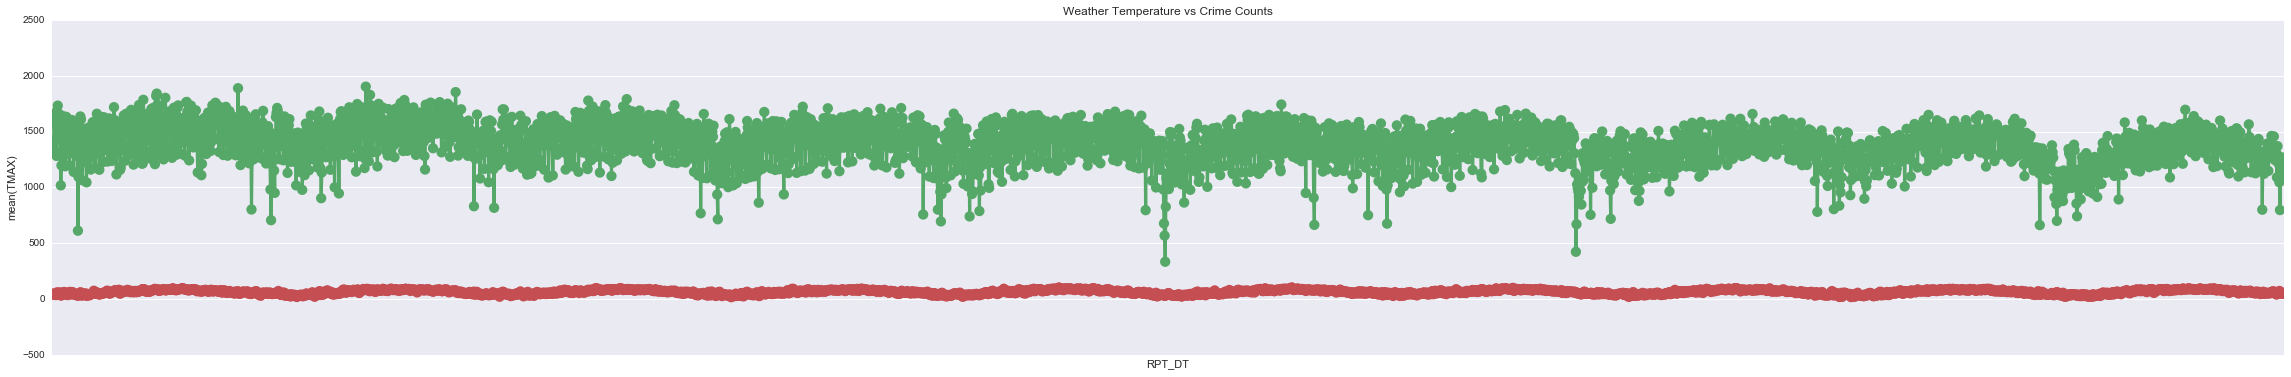

In [67]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize=(25, 6))
g = sns.pointplot("RPT_DT", "counts", data=merge, color="g", size=7)
plt.title("Weather Temperature vs Crime Counts")
f = sns.pointplot("RPT_DT", "TMAX", data=merge, color="r", size=7)
# plt.xticks([], [])
# plt.legend(['-g', '-r'], ["Crime Counts", "Temperature"])
# plt.savefig('C:/Users/Aileen/Desktop/results/weather_day_two.png')
sns.plt.show()

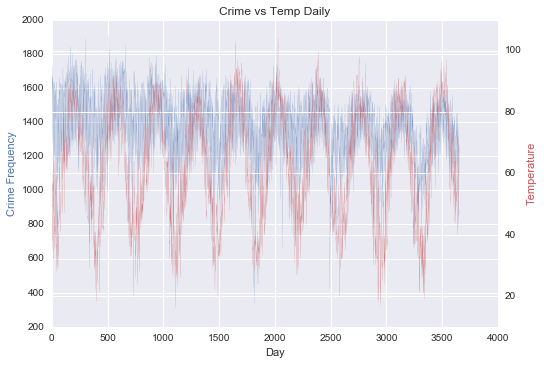

In [119]:
sns.set(style="darkgrid", color_codes=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(merge["counts"],'b', label = 'Crimes', linewidth = 0.1)
ax2.plot(merge["TMAX"], 'r', label = 'Temperature', linewidth = 0.1)
ax1.set_xlabel('Day')
ax1.set_ylabel('Crime Frequency', color = 'b')
ax2.set_ylabel('Temperature', color = 'r')
plt.title("Crime vs Temp Daily")
plt.savefig('C:/Users/Aileen/Desktop/results/crime_vs_temp_daily.png')
sns.plt.show()

#### Monthly

In [45]:
spec = ['01/31', '02/28', '03/31', '04/30', '05/31', '06/30', '07/31', '08/31', '09/30', '10/31', '11/30', '12/31']
month_count = []
month_temp = []
m = []

for month in range(1, 13, 1):
    for year in range(2006, 2016, 1):
        if len(str(month)) == 1:
            month = '0' + str(month)
        start = str(month) + '/01/' + str(year)
        end = spec[int(month) - 1] + '/' + str(year)
        
        subset = date_rng(start, end, merge)
        month_count.append(sum(subset['counts']))
        m.append(str(month) + '/' + str(year))
        month_temp.append(np.mean(subset['TAVG']))

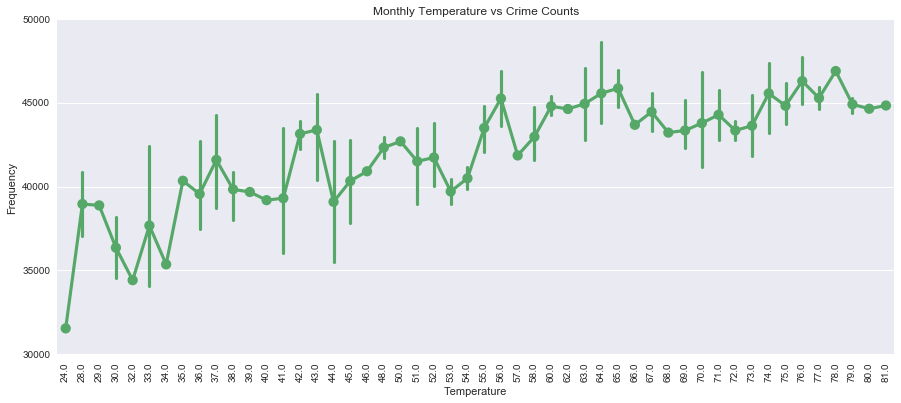

In [63]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize=(15, 6))

raw = {'Counts': month_count, 'Temp': month_temp}
month_p = pd.DataFrame(raw)
month_p = month_p.round(0)

g = sns.pointplot("Temp", "Counts", data = month_p, color="g", size=7)
plt.title("Monthly Temperature vs Crime Counts")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.savefig('C:/Users/Aileen/Desktop/results/weather_month.png')
sns.plt.show()

#### Monthly Average

In [83]:
spec = ['01/31', '02/28', '03/31', '04/30', '05/31', '06/30', '07/31', '08/31', '09/30', '10/31', '11/30', '12/31']
month_count = [0] * 12
month_temp = [0] * 12

for month in range(1, 13, 1):
    for year in range(2006, 2016, 1):
        if len(str(month)) == 1:
            month = '0' + str(month)
        start = str(month) + '/01/' + str(year)
        end = spec[int(month) - 1] + '/' + str(year)
        
        subset = date_rng(start, end, merge)
        month_count[int(month) - 1] = int(month_count[int(month) - 1]) + (np.mean(subset['counts']))
        month_temp[int(month) - 1] = int(month_temp[int(month) - 1]) + (np.mean(subset['TAVG']))

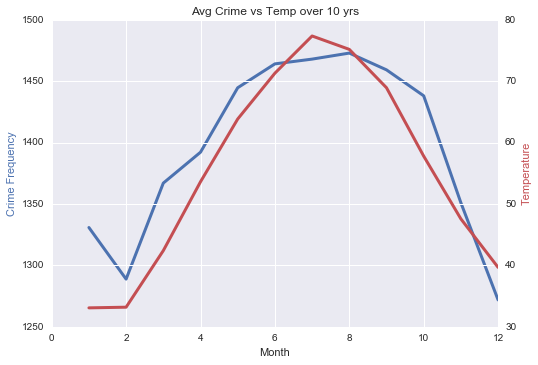

In [104]:
sns.set(style="darkgrid", color_codes=True)
# plt.figure(figsize=(15, 6))
l = list(range(1,13,1))
raw = {'Counts': [i/10 for i in month_count], 'Temp': [i/10 for i in month_temp], 'Month': l}
month_p = pd.DataFrame(raw)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(month_p['Month'], month_p["Counts"],'b', label = 'Crimes', linewidth = 3)
ax2.plot(month_p["Month"], month_p["Temp"], 'r', label = 'Temperature', linewidth = 3)
ax1.set_xlabel('Month')
ax1.set_ylabel('Crime Frequency', color = 'b')
ax2.set_ylabel('Temperature', color = 'r')
plt.title("Avg Crime vs Temp over 10 yrs")
plt.savefig('C:/Users/Aileen/Desktop/results/crime_vs_temp_10_yrs.png')
sns.plt.show()

In [114]:
from scipy.stats.stats import pearsonr   
pearsonr(month_p["Counts"], month_p["Temp"])

(0.93859002663894064, 6.2010899152822193e-06)